# Building the Hamiltonian for large systems
We now can try to describe a concrete example. Before doing this we need to be able to build Hamiltonians  and learn how to diagonalize it 
Fist build a $N\times  N$ Hermitian matrix. (E.g. set N=2)

In [10]:
import numpy as np
N=2
M=np.random.rand(2**N,2**N)+1j*np.random.rand(2**N,2**N)
M = M + M.T.conj()

np.max(M-M.T.conj())

0j

Now you can diagonalize it, and extract eigenvectors and eigenvalues, check that you can get back the original matrix 
$M = U m U^{\dagger}$

and that 
$M\vec{u}_1 = m_1 \vec{u}_1$


In [13]:
import scipy.linalg as LA
eig_M, U_M =LA.eigh(M)
print(eig_M)

first_eig = U_M[:,0].T.conj()@M@U_M[:,0]
print(first_eig)

[-1.65575015 -0.74998809  1.41347636  4.19624196]
(-1.6557501505223609-5.551115123125783e-17j)


Now we can study our first many body system, the Ising model in transverse field for $N=3$ spins, the Hamiltonian reads
$ H = -\sigma_x^1\otimes \sigma_x^2 - \sigma_x^2\otimes \sigma_x^3 -\sigma_x^3\otimes \sigma_x^1+\lambda \left(  \sigma_z^1+  \sigma_z^2+\sigma_z^3\right)$, build it for several values of $\lambda$ (e.g. 20 points in the interval $[0,10]$) and plot the ground state energy for every value. 

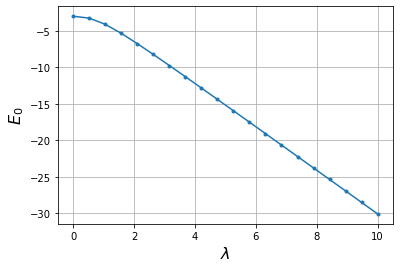

In [26]:
import matplotlib.pyplot as plt
N=3
identity = np.eye(2)
sigma_x = np.array([[0.,1.],[1.,0.]])
sigma_z = np.array([[1.,0.],[0.,-1.]])

gs_energy =[]
for v_lambda in np.linspace(0,10,20):
    H = -np.kron(sigma_x,sigma_x) + v_lambda*(np.kron(identity,sigma_z)+  np.kron(sigma_z,identity))

    H = np.kron(H,np.eye(2)) + np.kron(np.eye(2**(N-2)),-np.kron(sigma_x,sigma_x)) + (
        v_lambda*(np.kron(np.eye(2**(N-1)),sigma_z)))
                                                                                                                                                  
    H = H -np.kron(sigma_x, np.kron(np.eye(2**(N-2)),sigma_x))
    eig_H,_ =LA.eigh(H)
    gs_energy.append(eig_H[0])  
    
plt.plot(np.linspace(0,10,20),gs_energy,'.-')
plt.xlabel('$\lambda$',fontsize =16)
plt.ylabel('$E_0$', fontsize=16)
plt.grid('on')

We now move to the generic $N$ we do it recursively notice that going from $N$ to $N+1$ you need to perform a simple step

We wrap the above code into the function by using the 

def function():
return 

statements, we want to provide, $N$ and $\lambda$ as arguments and obtain the energies, the eigenvectors and the Hamiltonian as a result of our function evaluation


In [29]:
def build_and_diagonalize_H(N,v_lambda):
    identity = np.eye(2)
    sigma_x = np.array([[0.,1.],[1.,0.]])
    sigma_z = np.array([[1.,0.],[0.,-1.]])
    H = -np.kron(sigma_x,sigma_x) + v_lambda*(np.kron(identity,sigma_z)+  np.kron(sigma_z,identity))
    for n in range(3,N+1):
        H = np.kron(H,np.eye(2)) + np.kron(np.eye(2**(n-2)),-np.kron(sigma_x,sigma_x)) + (
        v_lambda*(np.kron(np.eye(2**(n-1)),sigma_z)))
                                                                                                                                                  
    H = H -np.kron(sigma_x, np.kron(np.eye(2**(N-2)),sigma_x))
    eig_H,U_H =LA.eigh(H)
    return H, eig_H, U_H

Now in the following we use the function just defined to see the first 10 energy levels of the spectrum for several values of the field for fixed $N=10$

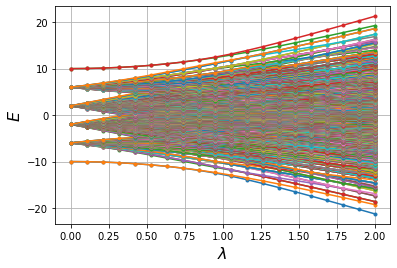

In [30]:
energies =[]
for v_lambda in np.linspace(0,2,20):
    _,eig_H,_ =build_and_diagonalize_H(10,v_lambda)
    energies.append(eig_H)
    
plt.plot(np.linspace(0,2,20),energies,'.-')
plt.xlabel('$\lambda$',fontsize =16)
plt.ylabel('$E$', fontsize=16)
plt.grid('on')

Now we can build the translation operator, that cyclically permute all the spins along the chain:
    
it sends spins $1,2 \cdots N-1, N$ into  $N, 1,2 \cdots N-1$

Again we want to create it iteratively starting from $N=2$, notice the simple recursion relation,


In [57]:
def build_and_diagonalize_tranlsation(N):
    swap = np.zeros((4,4))
    swap[0,0]=1.
    swap[3,3]=1.
    swap[2,1]=1.
    swap[1,2]=1.
    
    translation = swap
    for n in range(3,N+1):
        translation_tens_identity = np.kron(translation,np.eye(2))
        identity_tensor_last_swap =np.kron(np.eye(2**(n-2)),swap)
        translation = identity_tensor_last_swap@translation_tens_identity
    
    eig_T,U_T =LA.eig(translation)
    return translation, eig_T, U_T

Plot the eigenvalues on the complex plane, how do they look like?

Text(0, 0.5, 'Imag t')

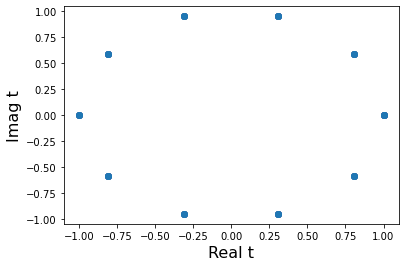

In [47]:
T,eig_T,_ =build_and_diagonalize_tranlsation(10)

plt.plot(eig_T.real,eig_T.imag, '.', markersize=10)
plt.xlabel('Real t', fontsize=16)
plt.ylabel('Imag t', fontsize=16)


Now we build a symmetry operator $S$ which is it? Check that the translation operator, the symmetry operator and the Hamiltonian commute 

In [51]:
def build_and_diagonalize_symm_op(N):
    sigma_z = np.array([[1.,0.],[0.,-1.]])
    symm_op = np.kron(sigma_z,sigma_z)
    for n in range(3,N+1):
        symm_op= np.kron(symm_op,sigma_z)                                                                                                         
   
    eig_symm,U_symm =LA.eigh(symm_op)
    return symm_op, eig_symm, U_symm

Check that the symmetry operators has only eigenvalue $\pm 1$

Text(0, 0.5, '$s_i$')

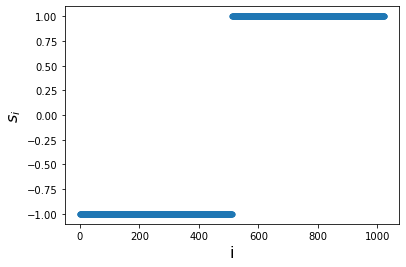

In [52]:
symm_op,eig_symm,_ =build_and_diagonalize_symm_op(10)
plt.plot(eig_symm ,'.', markersize=10)
plt.xlabel('i', fontsize=16)
plt.ylabel('$s_i$',fontsize=16)

Now we want to obtain the simultaneous eigenvectors for all three operators  we want to get the spectrum with the three quantum numbers
$|e, k , s\rangle$

$ H|e, k , s\rangle = e |e, k , s\rangle$

$ T|e, k , s\rangle = \exp(ik) |e, k , s\rangle$

$ S|e, k , s\rangle = (-1)^s |e, k , s\rangle$

The trick is to construct a linear combination of the three operators.
You want to build the combination in such a way that the order of the eigenvalues of H is still respected and the other operators are only used to break the degeneracy

e.g for $N=10$ 
$O = H +0.01*T+ 0.001*S$

We only want the first eigenvectors so we will use Lanczos, that is implement in https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.eigs.html


In [59]:
from scipy.sparse.linalg import eigs

H,_,_ =build_and_diagonalize_H(10,1.)
translation, _,_ =build_and_diagonalize_tranlsation(10)
symm_op,_,_ =build_and_diagonalize_symm_op(10)
Op_to_diag = H+ 0.01*translation -0.001*symm_op
first_eigenvalue,first_eigenvectors = eigs(Op_to_diag,k=20,which='SR')


Now we have to reconstruct the three eigenvalues we are interested in by using the matrix element of the operator in the desired eigenvealue

$e = \langle e, k , s |H |e, k , s\rangle$

$\exp (i k ) = \langle e, k , s |T |e, k , s\rangle$


$s =  \langle e, k , s |S|e, k , s\rangle$


also since we are interested in $k$ we take the phase of the complex number $\exp(ik)$ using the  cmath.phase() function, remember to import cmath,


Finally we plot all the above information in a dispersion relation, a plot of the Energy  ($e$) versus the momentum ($k$), and use different symbols for different symmetry charges.  



[(-12.7849064429993+0j), (-12.627503029350017+0j), (-11.53343072267741+0j), (-11.391435051850285-1.6653345369377348e-16j), (-11.391435051850285+1.6653345369377348e-16j), (-10.343206583880217-1.8648277366750676e-17j), (-10.343206583880217+1.8648277366750676e-17j), (-10.34320658388019-9.020562075079397e-17j), (-10.34320658388019+9.020562075079397e-17j), (-10.276362020180198+1.8041124150158794e-16j), (-10.276362020180198-1.8041124150158794e-16j), (-10.15536707435053+0j), (-9.391435051850307-1.1102230246251565e-16j), (-9.391435051850307+1.1102230246251565e-16j), (-9.33074145809221+8.673617379884035e-17j), (-9.33074145809221-8.673617379884035e-17j), (-9.330741458092206+1.3877787807814457e-17j), (-9.330741458092206-1.3877787807814457e-17j), (-9.152982445082966+0j), (-9.040294042680426+1.0928757898653885e-16j)]
[0.0, 0.0, 0.0, 0.6283185307179586, -0.6283185307179586, -1.2566370614359172, 1.2566370614359172, -0.6283185307179587, 0.6283185307179587, 1.2566370614359172, -1.2566370614359172, 0.0,

/home/luca/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/luca/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


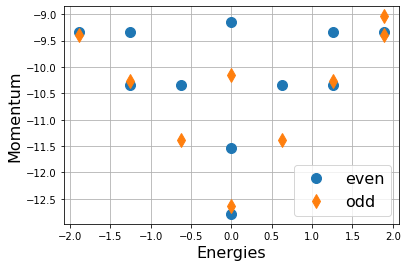

In [60]:
import cmath

energies =[]
momentum =[]
charges =[]
for k in range(0,20):
    e_v = first_eigenvectors[:,k].T.conj()@H@first_eigenvectors[:,k]
    energies.append(e_v)
    k_v = first_eigenvectors[:,k].T.conj()@translation@first_eigenvectors[:,k]
    momentum.append(cmath.phase(k_v))
    s_v =first_eigenvectors[:,k].T.conj()@symm_op@first_eigenvectors[:,k]
    charges.append(s_v)

print(energies)
print(momentum)
print(charges)
charges =np.array(charges)
energies=np.array(energies)
momentum=np.array(momentum)
print((charges-1))
mask_charges=np.less_equal(np.abs(charges-1),1e-10)

plt.plot(momentum[mask_charges],energies[mask_charges],'.',markersize=20,label='even')
mask_charges=np.less_equal(np.abs(charges+1),1e-10)
plt.plot(momentum[mask_charges],energies[mask_charges],'d',markersize=10,label='odd')
plt.legend(loc="lower right", fontsize=16)
plt.xlabel('Energies', fontsize=16)
plt.ylabel('Momentum', fontsize=16)
plt.grid('on')